In [2]:
# 数据分析常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 去除警告
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv('nigerian-songs.csv')
data

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [3]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

歌曲名称、专辑、艺术家、艺术家顶级流派、发行日期、长度、流行度、舞蹈性、音乐性、能量、乐器性、活跃度、响度、语速、节奏和时值  
各列都是530，均不存在空值，故无需进行缺失值处理。数据类型见Dtype


In [4]:
# 替换列名称，便于理解
# 原始列名: ['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']
data.columns = ['歌曲名称', '专辑', '歌手', '歌手主要流派', '发行日期', '时长(秒)', '流行度', '舞蹈性', '声学性', '能量值', '器乐性', '现场感', '响度(dB)', '语音性/说唱成分', '节拍速度(BPM)', '拍号']
# 查看数据的前5行
data

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长(秒),流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [5]:
# 统计每列的非重复值数量
data.nunique()

歌曲名称         497
专辑           428
歌手           171
歌手主要流派        19
发行日期          20
时长(秒)        518
流行度           66
舞蹈性          304
声学性          406
能量值          329
器乐性          294
现场感          362
响度(dB)       504
语音性/说唱成分     386
节拍速度(BPM)    514
拍号             3
dtype: int64

<Axes: xlabel='歌手主要流派'>

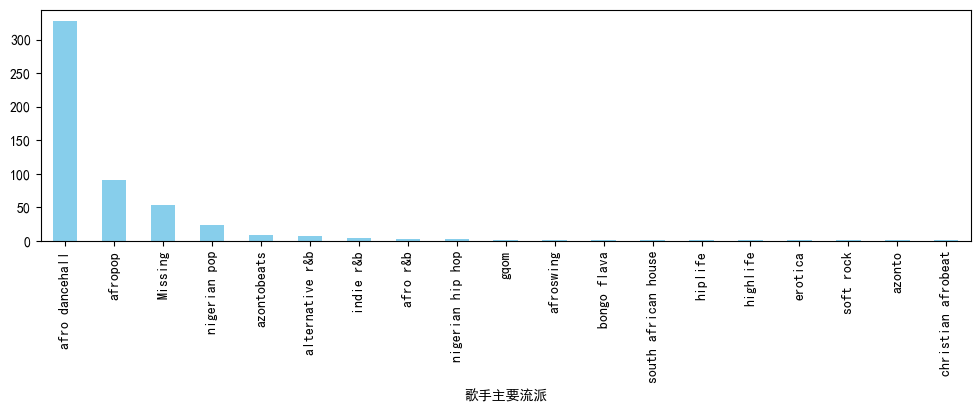

In [ ]:
data['歌手主要流派'].value_counts().plot(kind='bar', figsize=(12, 3), color='skyblue')

从上述可见对于尼日利亚歌曲数据集的中音乐偏好以afro dancehall流派最为流行，其次是afro pop流派，

# 聚类

1. 聚类方法以及实现
2. 聚类结果分析
3. 方法缺陷